### Activation maximization on MNIST

In [1]:
from __future__ import print_function
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import  Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [57]:
batch_size = 128
num_classes = 10
epochs = 1

#Input image dimensions
img_rows, img_cols = 28, 28

# Load the data
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

if K.image_data_format() == "channels_first":
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax', name='preds'))
# model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [3]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

469/469 [==============================] - 320s 676ms/step - loss: 0.2619 - accuracy: 0.9191 - val_loss: 0.0579 - val_accuracy: 0.9815


In [6]:
model.save("Cnn2.h5")

In [58]:
from tensorflow.keras.models import load_model
model = load_model("Cnn2.h5")

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 20s 58ms/step - loss: 0.0579 - accuracy: 0.9815: 18s - loss: 0.0223 - accuracy: 0.992 -  - ETA: 14s - loss: 0.0836 - accuracy: 0.975 - ETA: 13s - loss: 0.0834  - ETA: 12s - loss: 0.0893 - accuracy: - ETA: 12s - loss: 0.0848 - accuracy: 0 - ETA: 12s - loss: 0.0886 - ETA: 10s - loss: 0.0840 - accuracy: 0.973 - ETA: 10s - loss: 0.0834 - accuracy: 0. - ETA: 10s - loss:  - ETA: 9s - - ETA: 8s - loss: 0.0837 - accuracy - ETA: 8s - loss: - ETA: 4s - loss: 0.0673 - accu


[0.057891473174095154, 0.9815000295639038]

In [12]:
### Visualizing the Dense Layers
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [16]:
act_max = ActivationMaximization(model, model_modifier=[ExtractIntermediateLayer('preds'), ReplaceToLinear()], clone=False)

In [54]:
activations = act_max(CategoricalScore(0),
                           steps=200,
                           input_modifiers=[Jitter(jitter=16), Rotate2D(degree=1)],
                           regularizers=[TotalVariation2D(weight=1.0),
                                         Norm(weight=0.3, p=1)],
                           optimizer=tf.keras.optimizers.RMSprop(1.0, 0.999),
                           callbacks=[Progress()])

200/200 [==============================] - 11s 53ms/step - Score: 14.9439 - TotalVariation2D: 14.9609 - Norm: 34.1561TA: 7s - Score: -64.7493 - TotalVariation2D: 92.7574 - Norm: 37.827 - ETA: 7s - Score: -52.4972 - TotalVariation2D: 87.3864 - Norm: 3 - ETA: 7s - Score: -29.2982 - TotalVariation2D: 68.6300 - Norm: 37.47 - ETA: 7s - Score: -19.7097 - TotalVariation2D: 63.6261 - Norm: 37.39 - ETA: 6s - Score: -7.3529 - TotalVariation2D: 59.3870 - Norm: 37.3294 - ETA: 6s - Score: -7.0166 - TotalVariation2D: 55.8085 - Norm: 37.270 - ETA: 6s - Score: -2.5649 - TotalVariation2D: 52.8326 - Norm: 37 - ETA: 6s - Score: 35.5236 - TotalVariation2D: 44.2151 - Norm: 37.0 - ETA: 5s - Score: 32.7371 - TotalVariation2D: 39.6886 - Norm: 36. - ETA: 5s - Score: 22.8621 - TotalVariation2D: 34.8416 - Norm: 36.771 - ETA: 5s - Score: 21.7267 - TotalVariation2D: 33.8702 - Norm: 36.732 - ETA: 5s - Score: 21.2238 - TotalVariation2D: 32.9666 -  - ETA: 4s - Score: 13.6815 - TotalVariation2D: 25.0583 - Norm: 36.20 

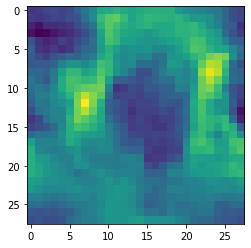

In [55]:
import matplotlib.pyplot as plt
plt.imshow(activations[0])
plt.show()

200/200 [==============================] - 8s 40ms/step - Score: 200.3264 - TotalVariation2D: 40.2116 - Norm: 34.7851A: 7s - Score: 50.7073 - TotalVariation2D: 118.5670 - Norm: 38.4 - ETA: 7s - Score: 62.6566 - TotalVariation2D: 103.8800 - Norm: 38.55 - ETA: 7s - Score: 128.2233 - TotalVariation2D: 96.7113 - Nor - ETA: 8s - Score: 215.9737 - TotalVariation2D: 82.5752 - Norm: 38. - ETA: 7s - Score: 254.6210 - TotalVariation2D: 78.9576 - Norm: 3 - ETA: 6s - Score: 233.1048 - TotalVariation2D: 74.3587 - Norm: 38.08 - ETA: 6s - Score: 232.7848 - TotalVariation2D: 72.7927 - Norm: 38.03 - ETA: 6s - Score: 214.9392 - TotalVariation2D: 71.4470 - Norm: 3 - ETA: 6s - Score: 241.6577 - TotalVariation2D: 67.8939 - Norm: 37.85 - ETA: 6s - Score: 242.1337 - TotalVariation2D: 66.9003 - Norm: 37.81 - ETA: 6s - Score: 249.4396 - TotalVariation2D: 65.9786 - Norm: 3 - ETA: 5s - Score: 228.3152 - TotalVariation2D: 63.2654 - Norm: 37.64 - ETA: 5s - Score: 226.6372 - TotalVariation2D: 62.3777 - Norm: 37. - 

200/200 [==============================] - 8s 42ms/step - Score: 479.2029 - TotalVariation2D: 39.0256 - Norm: 36.1400A: 7s - Score: 463.0372 - TotalVariation2D: 114.8808 - Norm: 38.93 - ETA: 7s - Score: 576.3760 - TotalVariation2D: 111.5964 - Norm: 38.90 - ETA: 6s - Score: 712.4307 - TotalVariation2D: 106.5823 - Nor - ETA: 6s - Score: 903.5593 - TotalVariation2D: 93.4777 - Norm: 38.29 - ETA: 6s - Score: 937.9851 - TotalVariation2D: 91.8317 - ETA: 7s - Score: 923.8287 - TotalVariation2D: 83.9194 - Nor - ETA: 6s - Score: 861.0128 - TotalVariation2D: 77.0334 - Norm: 37.56 - ETA: 6s - Score: 856.8378 - TotalVariation2D: 76.3401 - Norm: 37. - ETA: 6s - Score: 839.2694 - TotalVariation2D: 74.3871 - Norm: 37.45 - ETA: 6s - Score: 826.9587 - TotalVariation2D: 73.7787 - Norm: - ETA: 6s - Score: 782.4725 - TotalVariation2D: 7 - ETA: 5s - Score: 711.3733 - TotalVariation2D: 62.3784 - Norm: 37.00 - ETA: 5s - Score: 715.8124 - TotalVariation2D: 62.0156 - Norm: 36.99 - ETA: 5s - Score: 709.0450 - To

200/200 [==============================] - 8s 39ms/step - Score: -18.6697 - TotalVariation2D: 18.0847 - Norm: 39.9688A: 11s - Score: 162.2805 - TotalVariation2D: 110.8292 - Norm: 38.61 - ETA: 11s - Score: 160.3672 - TotalVariation2D: 106.3185 - Norm: 38.60 - ETA: 11s - Score: 175.9860 - TotalVariation2D: 101.9022 - Nor - ETA: 10s - Score: 133.7006 - TotalVariation2D: 74.9314 - Norm: 38 - ETA: 9s - Score: 75.1123 - TotalVariation2D: 66.2297 - Norm: 38.410 - ETA: 9s - Score: 66.0086 - TotalVariation2D: 64.9363 - Norm: 38.4 - ETA: 9s - Score: 66.3644 - TotalVariation2D: 59.6551 - Norm: 38 - ETA: 8s - Score: 58.2956 - TotalVariation2D: 52.8533 - Norm: 38.404 - ETA: 7s - Score: 59.1540 - TotalVariation2D: 51.4530 - Norm: 38.401 - ETA: 7s - Score: 56.6977 - TotalVariation2D: 50.1534 - Norm: 38.4 - ETA: 7s - Score: 53.1072 - TotalVariation2D: 46.5431 - Norm: 38.405 - ETA: 6s - Score: 48.8148 - TotalVariation2D: 45.5277 - Norm: 38.4 - ETA: 6s - Score: 41.1819 - TotalVariation2D: 42.7057 - Norm

200/200 [==============================] - 9s 46ms/step - Score: -91.0564 - TotalVariation2D: 14.7095 - Norm: 36.8479A: 7s - Score: 90.3852 - TotalVariation2D: 108.0128 - Norm: - ETA: 6s - Score: -109.0377 - TotalVariation2D: 72.7607 - Norm: 3 - ETA: 6s - Score: -95.0521 - TotalVariation2D: 52.2932 - Norm: 37.168 - ETA: 6s - Score: -91.4353 - TotalVariation2D: 49.7656 - Nor - ETA: 5s - Score: -103.5186 - TotalVariation2D: 39.0301 - Norm: 37.112 - ETA: 5s - Score: -103.2893 - TotalVariation2D: 37.7180 - Norm: 37.108 - ETA: 5s - Score: -98.1720 - TotalVariation2D: 36.4869 - Norm: 37 - ETA: 5s - Score: -89.8589 - TotalVariation2D: 33.7586 - Norm: 37.09 - ETA: 5s - Score: -88.6518 - TotalVariation2D: 33.3720 - Norm: 37. - ETA: 5s - Score: -86.3574 - TotalVariation2D: 31.9647 - Norm: 37. - ETA: 5s - Score: -85.0669 - TotalVariation2D: 30.8034 - Norm: 37. - ETA: 4s - Score: -85.6809 - TotalVariation2D: 30.0055 - Norm: 37. - ETA: 4s - Score: -82.3687 - TotalVariation2D: 29.2116 - Norm: 37.05 

200/200 [==============================] - ETA: 0s - Score: -33.2671 - TotalVariation2D: 15.1689 - Norm: 36.9537 ETA: 4s - Score: -45.8419 - TotalVariation2D: 57.9373 - Norm: 3 - ETA: 4s - Score: -46.7232 - TotalVariation2D: 50.1205 - Norm: 38.79 - ETA: 4s - Score: -43.3218 - TotalVariation2D: 48.2102 - Norm: 38.75 - ETA: 5s - Score: -40.5483 - TotalVariation2D: 46.4146 - Norm: 38. - ETA: 5s - Score: -43.1343 - TotalVariation2D: 44.8454 - Nor - ETA: 5s - Score: -43.5720 - TotalVariation2D: 40.2930 - Norm: 38. - ETA: 6s - Score: -44.9179 - TotalVariation2D: 39.1699 - Norm: 38. - ETA: 6s - Score: -45.2093 - TotalVariation2D: 38.0692 - Norm: 3 - ETA: 6s - Score: -44.2880 - TotalVariation2D: 36.4995 - Norm: 38. - ETA: 6s - Score: -44.5357 - TotalVariation2D: 35.0893 - Norm: 38. - ETA: 5s - Score: -44.2582 - TotalVariation2D: 33.4212 - Norm: 38.32 - ETA: 5s - Score: -44.6784 - TotalVariation2D: 32.6286 - Norm: 38.29 - ETA: 5s - Score: -44.7719 - TotalVariation2D: 31.8690 - Norm: 3 - ETA: 5s

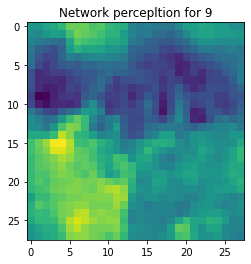

In [56]:
# Activations for all classes
for index in range(10):
    activations = act_max(CategoricalScore(index),
                           steps=200,
                           input_modifiers=[Jitter(jitter=16), Rotate2D(degree=1)],
                           regularizers=[TotalVariation2D(weight=1.0),
                                         Norm(weight=0.3, p=1)],
                           optimizer=tf.keras.optimizers.RMSprop(1.0, 0.999),
                           callbacks=[Progress()])
    plt.title("Network percepltion for {}".format(index))
    plt.imshow(activations[0])
plt.show()